In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

In [2]:
df = pd.read_csv('employee_promotion.csv')

In [3]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [4]:
df.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,NaN,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,49.0,0


In [5]:
df.shape

(54808, 13)

In [6]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [7]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won                int64
avg_training_score      float64
is_promoted               int64
dtype: object

In [8]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [10]:
df.iloc[1]

employee_id                  65141
department              Operations
region                   region_22
education               Bachelor's
gender                           m
recruitment_channel          other
no_of_trainings                  1
age                             30
previous_year_rating           5.0
length_of_service                4
awards_won                       0
avg_training_score            60.0
is_promoted                      0
Name: 1, dtype: object

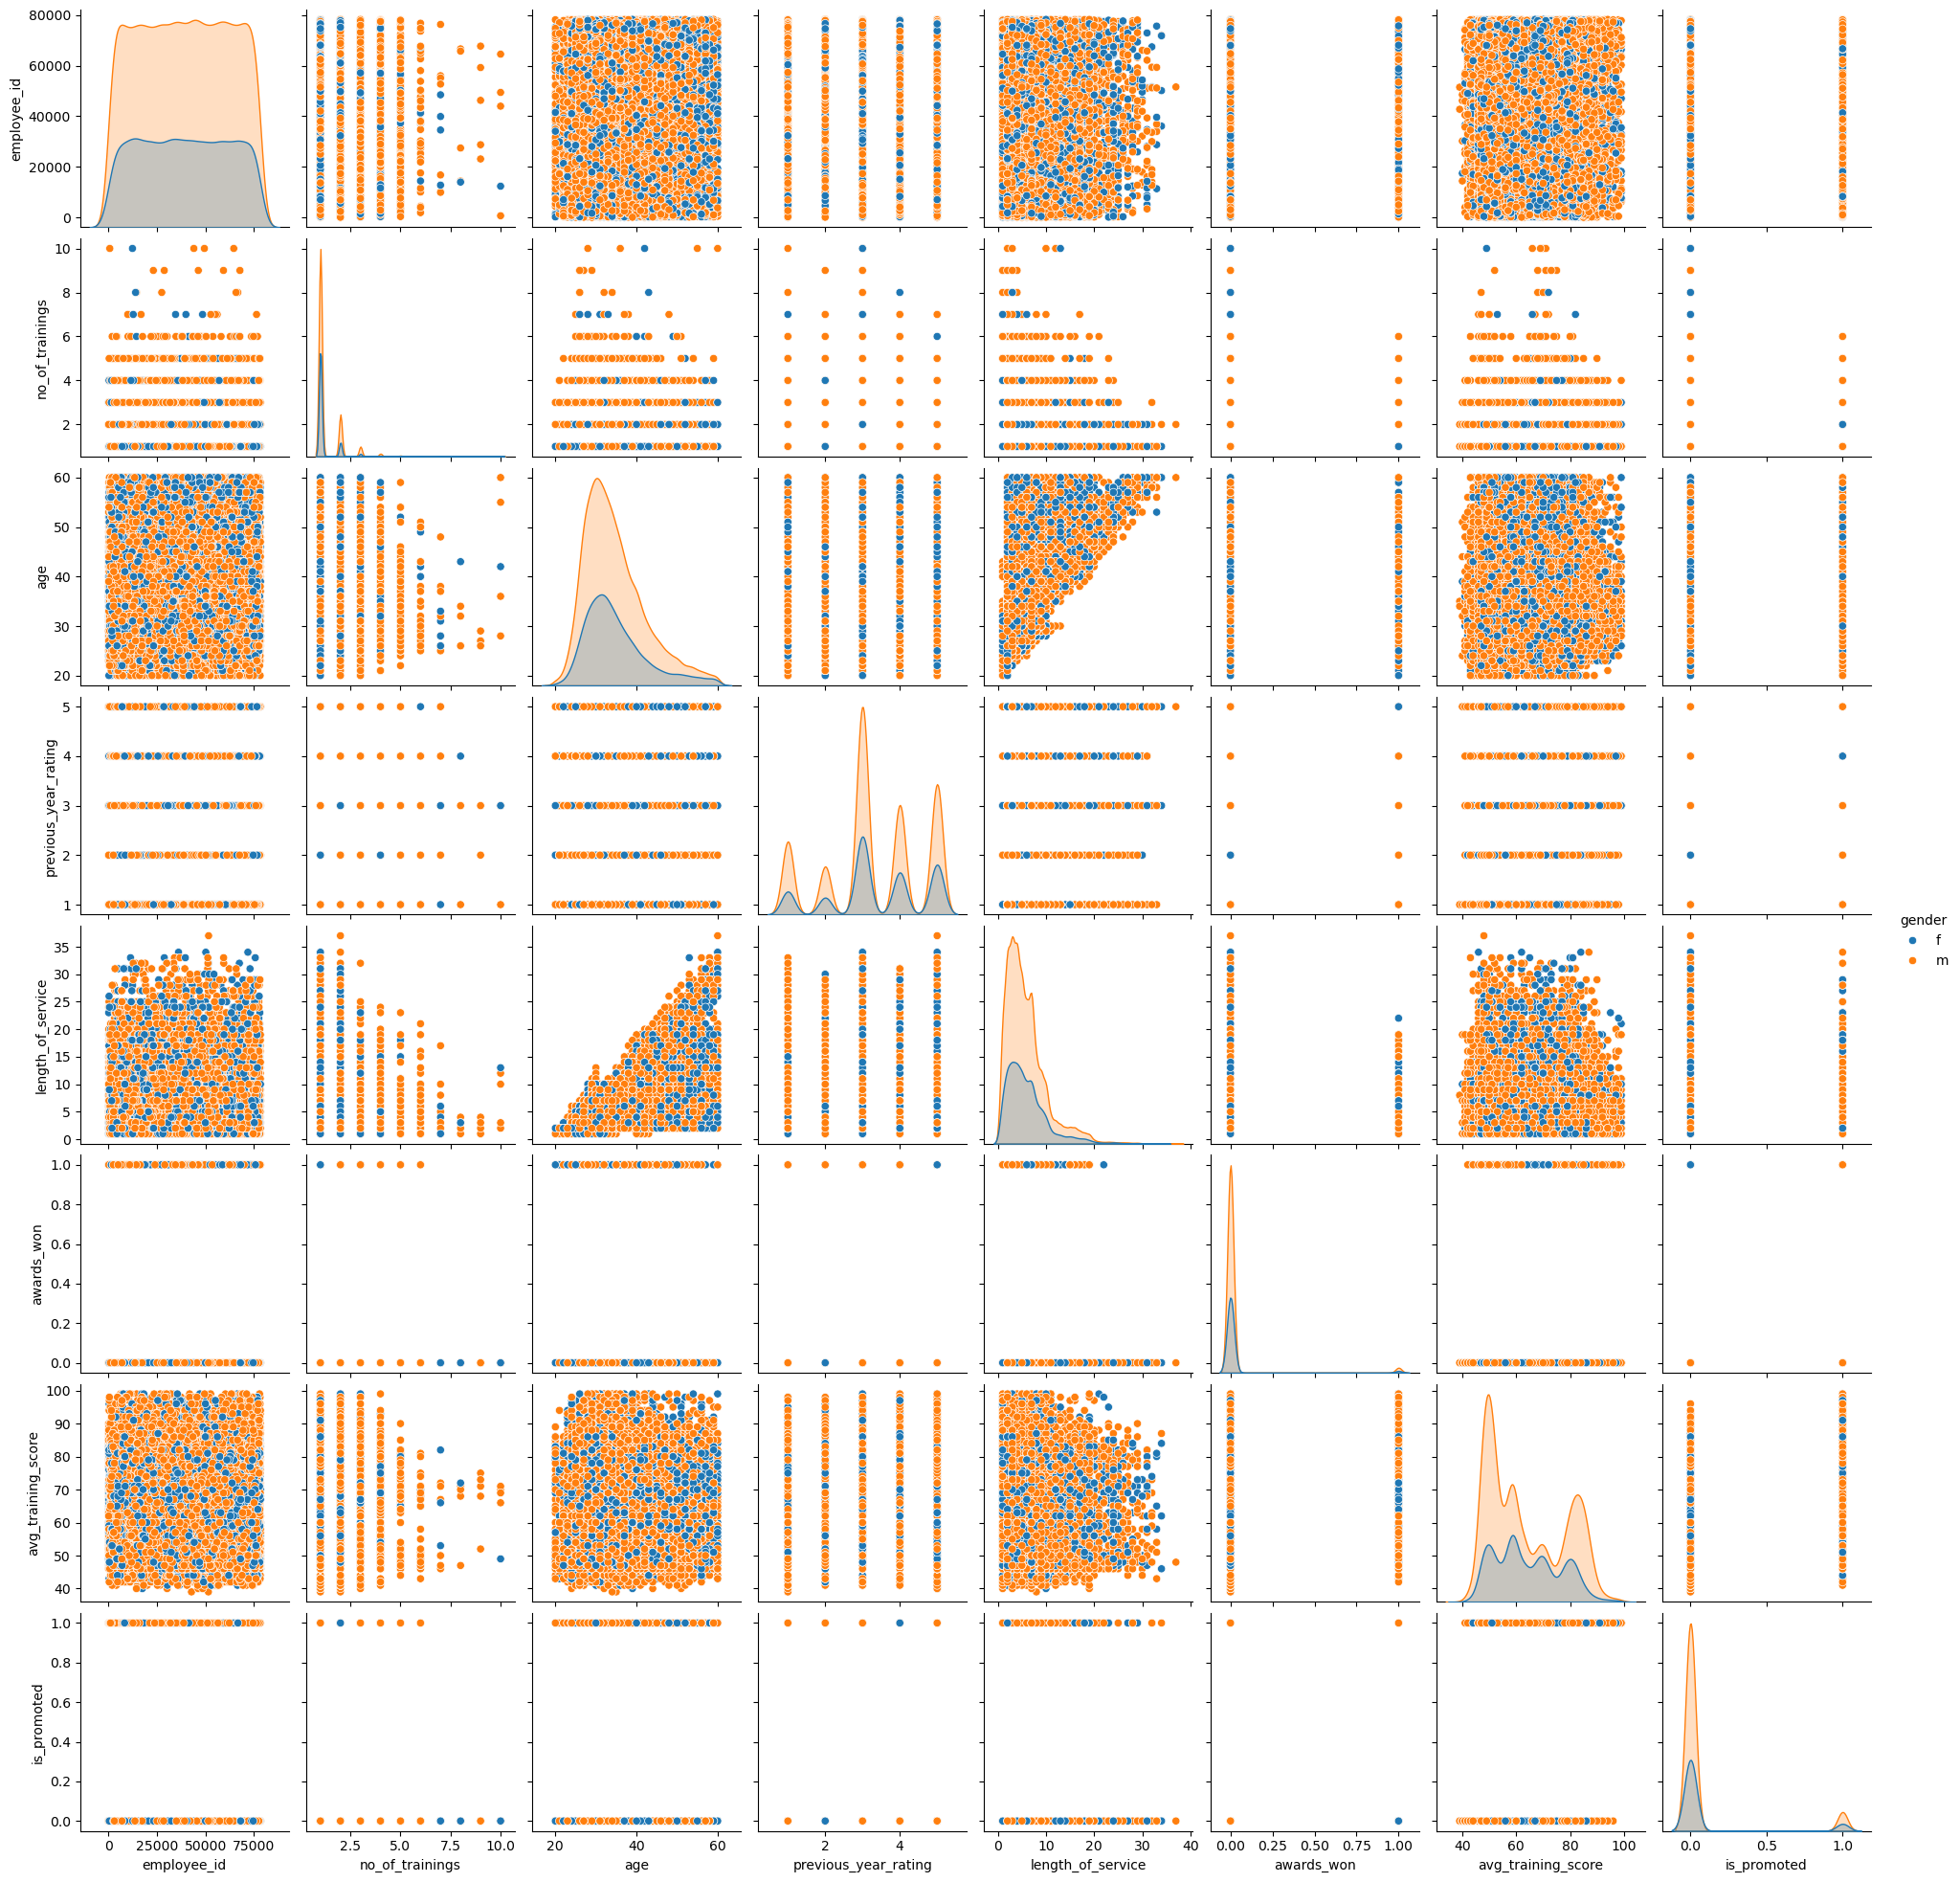

In [12]:
sns.pairplot(df, hue = 'gender')
plt.show()

In [14]:
tc=df.select_dtypes(include=['number']).corr()

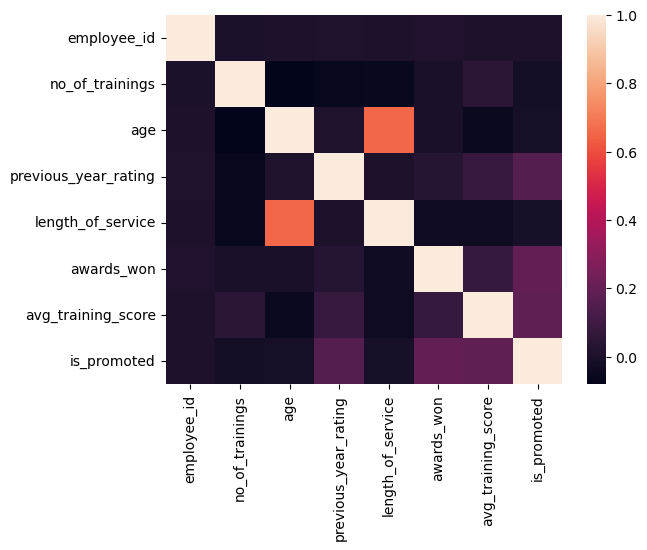

In [15]:
sns.heatmap(tc)
plt.show()

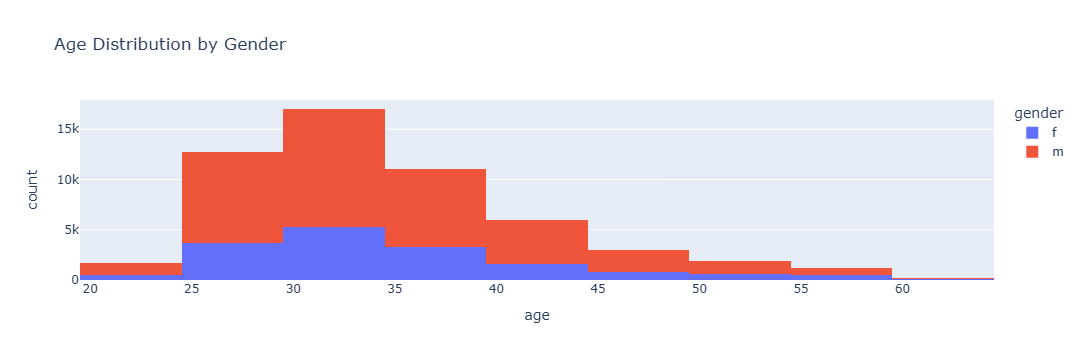

In [18]:
fig = px.histogram(df, x="age", color="gender", nbins=20,
                   title="Age Distribution by Gender")
fig.show()


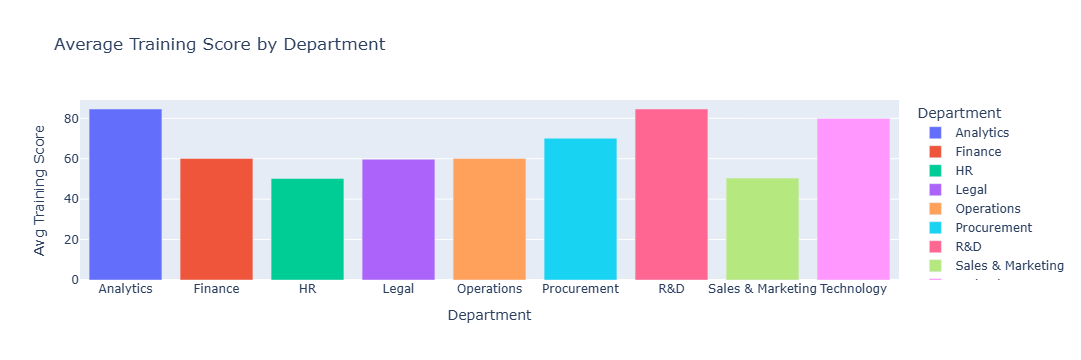

In [26]:
avg_score_by_dept = df.groupby('department', as_index=False)['avg_training_score'].mean()
fig = px.bar(
    avg_score_by_dept,
    x='department',
    y='avg_training_score',
    title='Average Training Score by Department',
    labels={'avg_training_score': 'Avg Training Score', 'department': 'Department'},
    color='department'  # Optional: adds different color for each bar
)
fig.show()

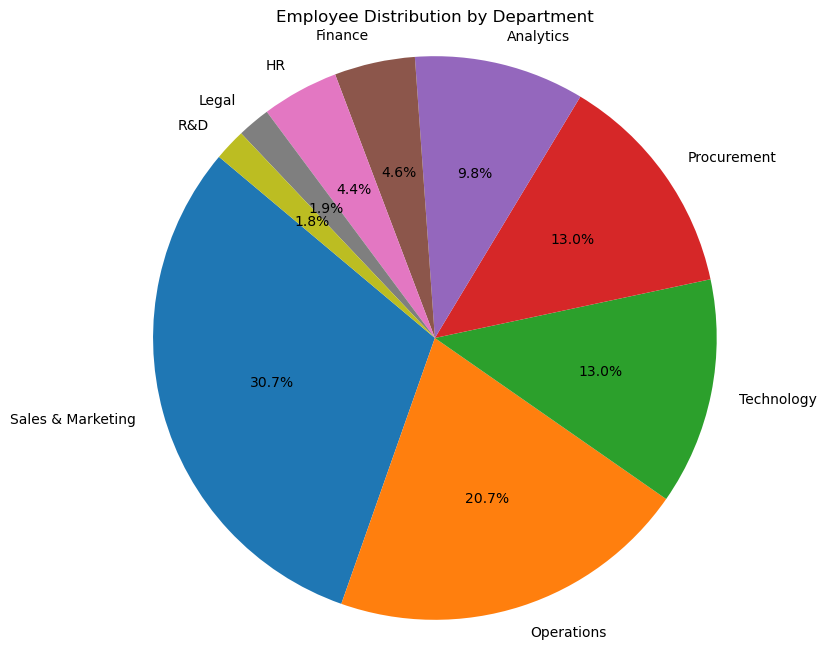

In [20]:
dept_counts = df['department'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(dept_counts, labels=dept_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Employee Distribution by Department')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


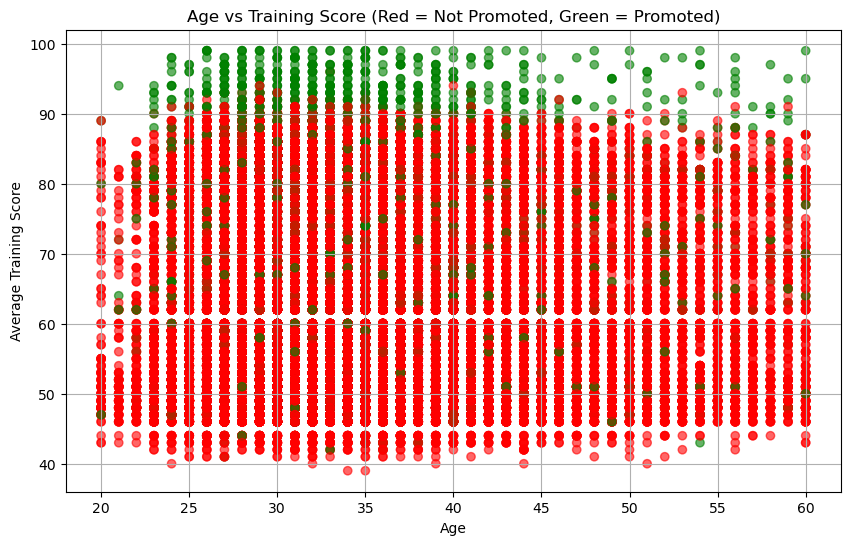

In [21]:
plt.figure(figsize=(10, 6))
colors = df['is_promoted'].map({0: 'red', 1: 'green'})
plt.scatter(df['age'], df['avg_training_score'], c=colors, alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Average Training Score')
plt.title('Age vs Training Score (Red = Not Promoted, Green = Promoted)')
plt.grid(True)
plt.show()


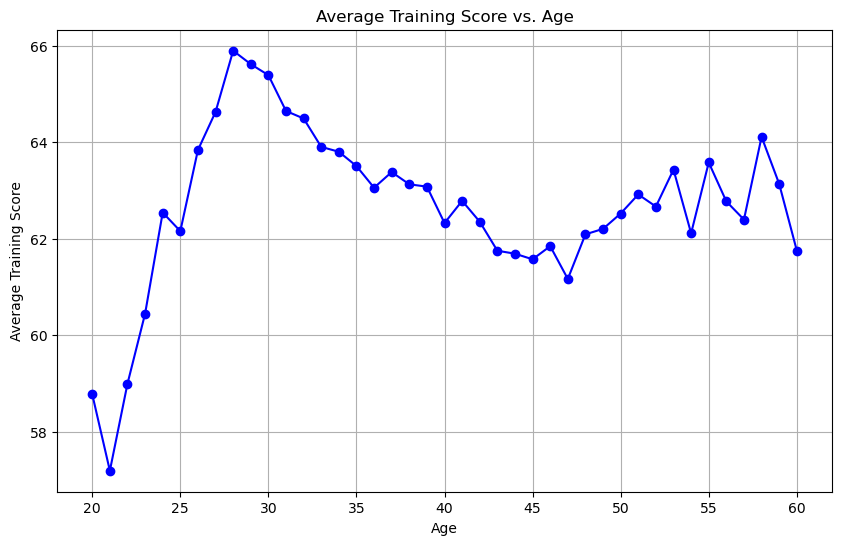

In [25]:
age_vs_score = df.groupby('age')['avg_training_score'].mean()
plt.figure(figsize=(10, 6))
plt.plot(age_vs_score.index, age_vs_score.values, marker='o', linestyle='-', color='blue')
plt.xlabel('Age')
plt.ylabel('Average Training Score')
plt.title('Average Training Score vs. Age')
plt.grid(True)
plt.show()

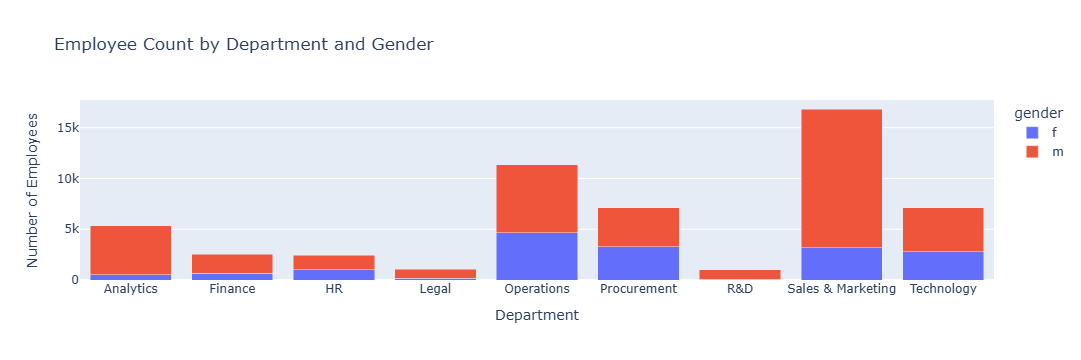

In [24]:
grouped_data = df.groupby(['department', 'gender']).size().reset_index(name='count')
fig = px.bar(
    grouped_data,
    x='department',
    y='count',
    color='gender',
    title='Employee Count by Department and Gender',
    labels={'count': 'Number of Employees', 'department': 'Department'},
    barmode='stack' 
)

fig.show()


In [35]:
df.drop('employee_id',axis=1,inplace=True)
df.drop('region',axis=1,inplace=True)

In [36]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df.columns:
    print(i)
    if df[i].dtype == 'object':
        df[i]=l.fit_transform(df[i])

department
education
gender
recruitment_channel
no_of_trainings
age
previous_year_rating
length_of_service
awards_won
avg_training_score
is_promoted


In [37]:
df.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,7,2,0,2,1,35,5.0,8,0,49.0,0
1,4,0,1,0,1,30,5.0,4,0,60.0,0
2,7,0,1,2,1,34,3.0,7,0,50.0,0
3,7,0,1,0,2,39,1.0,10,0,50.0,0
4,8,0,1,0,1,45,3.0,2,0,73.0,0


In [38]:
df.columns

Index(['department', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')